# Základy řešení parciálních diferenciálních rovnic

Zavzpomíname-li na základní kurzy matematické analýzy, jistě si vzpomene, jak nesnadné je analytické řešení parciálních diferenciálních rovnic, pokud vůbec lze řešení najít. Když pomineme učebnicové příklady (za zmínku stojí například vlnová rovnice), stojíme většinou před neřešitelným problémem. Naštestí pro nás ale pro fyziku obecně, pomocnou ruku nám podá numerické řešení problému a síla současné výpočetní techniky - počítače. Jak ale na to? Jak převést rovnici, kterou jsme dostali aplikací fyzikálních zákonů pro konkrétní problém do řeči čísel? Následující kapitola se vám pokusí v tom udělat trochu jasněji.

## Metoda konečných diferencí

Jednou z nejpoužívanějších metod, která je zároveň vhodná pro názornou ilustraci, je *metoda konečných diferencí*. Nejedná se o nic jiného než diskrétní reprezentaci patřičných proměnných, funkcí a derivací definovaného problému, se kterou jsme se již setkali v kapitole *Řešení obyčejných diferenciálních rovnic*. Na úvod to zni složitě ale ve skutečnosti je to velmi jednoduché. Vše co k tomu budeme potřebovat je znalost Taylorova rozvoje funkce. Názorně si to ilustrujeme na jednoduché rovnici advekce-difůze

\begin{equation}
\frac{\partial u}{\partial t} + v \frac{\partial u}{\partial x} = D \frac{\partial^2 u}{\partial x^2}
\tag{1}
\end{equation}

zahrnující v sobě jak difúzní $D\frac{{\partial}^2 u}{\partial x^2}$ , tak advekční člen $v\frac{\partial u}{\partial x}$. Funkce $u(x,t)$ nám udává $x$-ovou hodnotu rychlosti. Numerický přístup řešení této rovnice spočívá v reprezentaci $u$ souborem diskrétních hodnot $u_{i}$ v bodech diskrétní sítě 

$$
x_0, x_1, x_2, x_3, \dots, x_i \dots, x_N \quad (x_0 < x_1 < x_2 \dots < x_{N})
$$

Na první pohled je patrné, že s rostoucím počtem bodů sítě, se bude naše reprezentace blížit skutečné, které bychom dosáhli pro $N = \infty$.

### Prostorové derivace

S touto reprezentací se můžeme dále pustit do aproximací prostorových derivací. K tomu využijeme Taylorova rozvoje okolo bodu $u_i$ pro hodnotu v bodě $u_{i+1}$. Směle můžeme psát

\begin{equation}
u_{i+1}=u_{i}+\left(\frac{\partial u}{\partial x}\right)_{i}\Delta x + \left(\frac{{\partial}^2 u}{\partial x^2}\right)_{i}\frac{(\Delta x)^2}{2}+
\left(\frac{{\partial}^3 u}{\partial x^3}\right)_{i}\frac{(\Delta x)^3}{6}+\dots
\label{FF}
\end{equation}

Obdobně pro hodnotu $u_{i-1}$

\begin{equation}
u_{i-1}=u_{i}-\left(\frac{\partial u}{\partial x}\right)_{i}\Delta x + \left(\frac{{\partial}^2 u}{\partial x^2}\right)_{i}\frac{(\Delta x)^2}{2}-
\left(\frac{{\partial}^3 u}{\partial x^3}\right)_{i}\frac{(\Delta x)^3}{6}+\dots
\label{FB}
\end{equation}

Z Taylorova rozvoje můžeme jednoduše vyjádřit vztah pro derivaci v daném bodě $i$ pomocí hodnot např. $u_{i}$ a $u_{i+1}$ (nebo také  $u_{i}$ a $u_{i-1}$)

$$
\left(\frac{\partial u}{\partial x}\right)_{i}=\frac{u_{i+1}-u_{i}}{\Delta x}-\left(\frac{{\partial}^2 u}{\partial x^2}\right)\frac{\Delta x}{2}-\left(\frac{{\partial}^3 u}{\partial x^3}\right)\frac{(\Delta x)^2}{6}+\dots
$$

Tím se dostaváme k určení prvních derivací podle prostorové souřadnice, rozlišujeme

<div class="panel panel-primary">
<div class="panel-heading">Diference I. řádu - první derivace</div>
<div class="panel-body">

<strong>Prostorové diference (vpřed) FDS</strong>

\begin{equation}
\left(\frac{\partial u}{\partial x}\right)_{i}= \frac{u_{i+1}-u_{i}}{\Delta x}+O(\Delta x)
\label{FD}
\end{equation}

<strong>Prostorové diference (dozadu) BDS</strong>
\begin{equation}
\left(\frac{\partial u}{\partial x}\right)_{i}= \frac{u_{i}-u_{i-1}}{\Delta x}+O(\Delta x)
\label{BD}
\end{equation}

</div>
</div>

Vidíme tak, že první prostorové derivace naší funkce můžeme jednoduše vyjádřit ze znalostí hodnot funkce $u$ v diskrétních bodech $i-1, i, i+1$, v závislosti na zvoleném způsobu (\ref{FD}) resp. (\ref{BD}). Chyba, které se při této aproximaci dopouštíme, je prvního řádu $O(\Delta x)$, jak je patrné z Taylorova rozvoje.

V mnoha případech není však metoda prvního řádu dostatečná, je třeba použít přesnější metody, tedy druhého řádu. 
Odečtením rovnic (\ref{FF}) a (\ref{FB}) pro diferenci vzad a vpřed s Taylorovym rozvojem dostaneme výraz pro středovou diferenci (CD) s přesností druhého řádu

<div class="panel panel-primary">
<div class="panel-heading">Diference II.řádu - první derivace</div>
<div class="panel-body">

**Prostorové diference (centrální) CDS**

\begin{equation}
\left(\frac{\partial u}{\partial x}\right)_{i}= \frac{u_{i+1}-u_{i-1}}{2\Delta x}+O(\Delta x)^2
\label{CD}
\end{equation}

</div>
</div>

Nic nám již nebrání, abychom vyjádřili i druhé derivace. Stačí nám k tomu sečíst rovnice (\ref{FF}) a (\ref{FB}) a po úpravě dostáváme pro druhou derivaci diferenční vztah s přesností třetího řádu

<div class="panel panel-primary">
<div class="panel-heading">Diference I. řádu - druhá derivace</div>
<div class="panel-body">
**Diferenční vztah pro druhou derivaci**

\begin{equation}
\left(\frac{{\partial}^2 u}{\partial x^2}\right)_{i}=\frac{u_{i+1}-2u_i+u_{i-1}}{(\Delta x)^2}
\tag{4}
\end{equation}

</div>
</div>

### Časové derivace

Obdobně budeme postupovat při určování časové derivace, nicméně je třeba přiznat, že se nám situace trochu komplikuje. Příčina změny je patrná z předchozích vzorců, rozdíl spočívá ve znalosti prostorových hodnot $u_i$ v daném časovém okamžiku. Prostorové derivace můžeme vyjádřit velmi snadno, pro časovou derivaci je třeba uvážit, že známé hodnoty funkce $u_i(t)$ jsou pouze ty současné (přítomnost) a z předchozích kroků (minulost). Hodnoty následující nám známé nejsou a je třeba je určit. Pro lepší pochopení si nejprve formálně vyjádříme časovou derivaci z rovnice  (1)

\begin{equation}
\frac{\partial u}{\partial t}=h(u,x,t)
\tag{3}
\end{equation}

Dále budeme postupovat jako pro prostorové derivace, nejprve diskretizujeme čas na jednotlivé kroky

$$
t_0, t_1, t_2, t_3, \dots, t_{n} \dots, x_{M} \quad (t_0 < t_1 < t_2 \dots < t_{M}).
$$

Pak rovnice (3) v jednotlivých časových krocích má podobu

\begin{equation}
\left(\frac{\partial u}{\partial t}\right)^{n}=h^{n}(u^{n},x,t_{n})
\tag{4}
\end{equation}

kde horní index u diskrétních veličin značí $n-$-tý časový krok. Následně aproximujeme časovou derivaci podle stejného receptu jako pro prostorové derivace, tedy z Taylorova rozvoje. Dostáváme pro dopřednou diferenci

<div class="panel panel-primary">
<div class="panel-heading">Časové diference I. řádu</div>
<div class="panel-body">

**(vpřed) FDT**

\begin{equation}
\left(\frac{\partial u}{\partial t}\right)_{i}^{n} = \frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t} + O(\Delta t)
\end{equation}

</div>
</div>

Víme, že díky počatečním podmínkám známe v daném počátečním okamžiku $t_0$ všechny hodnoty 
$u_i$, pro $i=1,\dots,N$.  Jak je patrné ze vztahu pro časovou derivaci **FDT**, veličinou s neznámou hodnotou je $u_i^{n+1}$, kterou určíme na základě známých hodnot z času $t_n$. Pro časovou derivaci (3) aproximovanou s pomocí **FDT** tedy platí

\begin{eqnarray}
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=h^{n}(u^{n},x,t_n)\\
u_{i}^{n+1}=u_{i}^n+h^{n}\Delta{t}+O(\Delta x).
\end{eqnarray}

Tento hojně využívaný přístup je označován jako explicitní metoda konečných diferencí v čase směrem vpřed (**FFTD**). Obdobně pokud využijeme druhý způsob vyjádření derivace, tedy  zpětnou differenci

<div class="panel panel-primary">
<div class="panel-heading">Časové diference I. řádu</div>
<div class="panel-body">

**Časové diference (dozadu) BDT**

\begin{equation}
\left(\frac{\partial u}{\partial t}\right)_{i}^{n}= \frac{u_{i}^{n}-u_{i}^{n-1}}{\Delta t}+O(\Delta t)
\end{equation}

<div>
</div>

Pro časovou derivaci (3) aproximovanou pomocí **BDT** tak plyne

\begin{equation}
\frac{u_{i}^{n}-u_{i}^{n-1}}{\Delta t}=h^n(u^{n},x,t_n).
\end{equation}

Rozdílná situace oproti vztahu (5) spočívá v neznalosti $u^n$ a $h^n$. přeznačením $n \equiv (n+1)$ dostaneme ekvivaletní vztah, ve kterém však vystupují neznámé veličiny na obou stranách
\begin{equation}
u_{i}^{n+1}=u_{i}^n+h^{n+1}\Delta{t}+O(\Delta x).
\end{equation}

Toto schéme je označována jako implicitní metoda (**BFTD**). Sečtením vztahů (6) a (5) dostaneme pak obdobné vyjádření (taktéž implicitní) takzvané centrální diferenční schéma **CDT** (s přesností druhého řádu)

\begin{equation}
u_{i}^{n+1}=u_{i}^n+\frac{(h^{n+1}+h^{n})}{2}\Delta{t}+O(\Delta x)^2
\end{equation}

O tom, který ze způsobu vyjádření je lepší lze vést dlouhé diskuze, každý z těchto způsobů má své výhody a nevýhody, ať už z hlediska výpočetních nároků a nebo stability. 

## Problém lineární advekce
Nyní je již vše připraveno pro převod (1) do diskrétního schématu. Abychom si celou situaci více zjednodušili, předpokládejme, že ze koeficient difůze $D=0$. Rovnice se nám redukuje na tvar

\begin{equation}
\frac{\partial u}{\partial t} + v \frac{\partial u}{\partial x} = 0
\end{equation}

Důvod je prostý, nejenže je rovnice jednodušší ale známe i analytické řešení této rovnice. Popisuje nám šíření signálu s počátečním tvarem $u(x,0) = u_0$. Exaktní řešení má tvar

$$
u(x,t) = u_0(x-vt),
$$

což znamená, že v případě lineární advekce se signál $u(x,t)$ šíří rychlostí $v$ a nemění přitom svůj počáteční tvar $u_0$. Ukázka řešení rovnice *advekce-difůze* pro čas $t=2.5$ a rychlost advekce $v=0.2$ ilustrujeme následujícím příkladem

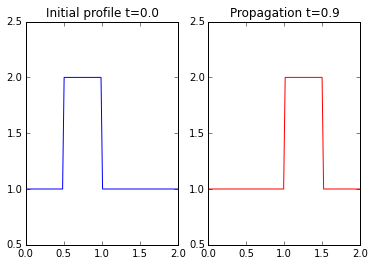

In [13]:
# Exact solution of linear advection equation

%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# Calculate initial box-profile
def box_profile(x):
    
    u = np.ones_like(x)
    ubound = np.where(x >= 0.5)
    lbound = np.where(x <= 1)
    u[np.intersect1d(lbound,ubound)] = 2.0
    
    return u

# Calculate exact solution of linear-advection equation
# for given advection speed v and time t
def solution(t,v,u,x):
    u_new = np.empty(np.size(u))
    u_new[np.where((x - v*t) < 0)] = 1.0
    indexes = np.where((x - v*t) > 0)
    u_new[indexes] = box_profile(x[indexes]-v*t)
    return u_new

# Initialize x-variable array 
x = np.linspace(0, 2, 100)

# Initial profile 
u1 = box_profile(x)

# Propagation time
t = 2.5
# Advection speed
v = 0.2


plt.figure(1)

plt.subplot(121)
plt.title('Initial profile t=0.0')
plt.ylim((0.5,2.5))
plt.xlim((0,2))
plt.plot(x, u1, 'b-')


u2 = solution(t,v,u1,x)

plt.subplot(122)
plt.title('Propagation t=2.5')
plt.ylim(0.5,2.5)
plt.xlim((0,2))
plt.plot(x,u2,'r-')

Nyní přejdeme k numerickému řešení rovnice. V rámci názorné ilustrace použijeme pro časovou derivaci aproximaci **FDT** a pro prostorovou derivaci **BDS**. Rovnici  (9)
tak přepíšeme do tvaru

$$
\frac{u_i^{n+1}-u_i^n}{\Delta t}+v\frac{u_i^n-u_{i-1}^n}{\Delta x} = 0
$$

Jedná se o explicitní přístup, takže si na pravou stranu převedeme všechny známé veličiny v daném časovém kroku

$$
u_i^{n+1} = u_i^{n}-v\frac{\Delta t}{\Delta x}(u_i^{n}-u_{i-1})
$$

Toto jednoduché schéma nyní převedeme do PYTHONu

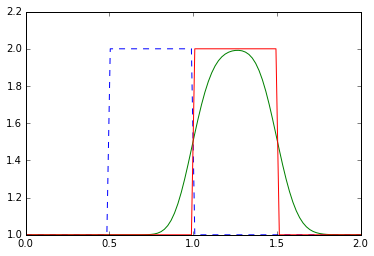

In [18]:
# Casovy krok
dt = 0.01
# Diskretizace prostorove promenne x
x = np.linspace(0,2,100)
# Odpovidajici prostorovy krok
dx = 0.02

# Advekcni rychlost
v = 0.2
# Doba vypoctu
t_end = 2.5

# Definice prave strany numerickeho schematu
def right_side(u,v,dt,dx):
    
    u_new=u.copy()
    u_new[1:]=u[1:]-v*dt/dx*(u[1:]-u[:-1])
    
    return u_new


# Okrajove podminky 
def boundary(u):
    N = np.size(u)
    # Periodic boundary
    u[0] = u[N-1]
    u[N-1] = u[N-2]
    return u

# Hlavni cyklus programu , opakujici vypocet do dosazeni daneho casu t_end
def run():
    t = 0.0
    u = box_profile(x)
    while (t < t_end): 
        u = right_side(u,v,dt,dx)
        u = boundary(u)
        t = t + dt
    return u

u = run()

# Srovnani numerickeho a exaktniho reseni
plt.plot(x,u1,'--')
plt.plot(x,u,'-')
plt.plot(x,u2,'r-')     

### Aktivity
* Použijte ve výše uvedené schématu místo diference **BDS** diferenci **FDS** resp. **CDS**. Schéma upravte k výpočtu a diskutuje výsledek
* Analyzujte vliv změny prostorového a časového kroku

Předchozí jednoduché schéma bylo explicitní, ve schématu vystupovala v daném časovém kroku vždy jen jedna neznámá. Teď si ukážeme jednoduché implicitní schéma a vyjdeme z příkladu výše tedy rovnice advekce. V rámci aktivit jste měli napsat schéme, kde místo **BDS** diference, jste použili diferenci **CDS**. To bude náš výchozí bod, přičemž diferenci upravíme tak, že hodnota diskrétní funkce $u$ v daném bodě $i-1$ resp. $i+1$ v časovém korku $n$, bude dána průměrem hodnot z časového kroku $n$ a $n+1$. Tedy

\begin{equation}
\frac{1}{2\Delta x}\left(u_{i+1}^n-u_{i-1}^n\right) \rightarrow \frac{1}{2\Delta x}\left(\frac{1}{2}\left(u_{i+1}^{n+1}+u_{i+1}^n\right)-\frac{1}{2}\left(u_{i-1}^{n+1}+u_{i-1}^{n}\right)\right)
\end{equation}

Takto zvolené numerické schéma pro rovnici advekce má tvar

\begin{equation}
u_{i}^{n+1} = u_i^n-\frac{1}{2}\frac{v\Delta t}{\Delta x}\left(\frac{1}{2}\left(u_{i+1}^{n+1}+u_{i+1}^n\right)-
\frac{1}{2}\left(u_{i-1}^{n+1}+u_{i-1}^n\right)\right)
\end{equation}

Všechny neznáme veličiny dáme na levou stranu a na pravé straně necháme všechny známé

\begin{equation}
-\frac{1}{4}\frac{v\Delta t}{\Delta x}u_{i-1}^{n+1} + u_i^{n+1} + \frac{1}{4}\frac{v\Delta t}{\Delta x}u_{i+1}^{n+1}=u_i^n-\frac{1}{4}\frac{v\Delta t}{\Delta x}\left(u_{i+1}^n-u_{i-1}^n\right)
\end{equation}

Pro přehlednost si ještě označíme

$$
\beta = \frac{1}{4}\frac{v\Delta t}{\Delta x}
$$

a výsledné schéma je 

\begin{equation}
-\beta u_{i-1}^{n+1}+ u_i^{n+1} + \beta u_{i+1}^{n+1} = u_i^n- \beta\left(u_{i+1}^n-u_{i-1}^n\right)
\end{equation}

Jedná se o soustavu rovnic, která má v maticové formě tvar

\begin{equation}
\begin{pmatrix}
1 & \beta & 0 & \cdots & \cdots & 0 \\
-\beta & 1 & \beta & \ddots & \ddots & \vdots \\
0 & -\beta & 1 & \beta & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \ddots & -\beta & 1 & \beta \\
0 & \cdots & \cdots & 0 & -\beta & 1 
\end{pmatrix}
\begin{pmatrix}
u_2 \\ 
u_3 \\
\vdots \\
\\
\vdots \\
u_{N-1}
\end{pmatrix}=
\begin{pmatrix}
R_2 \\
R_3 \\
\vdots \\
\\
\vdots\\
R_{N-1}
\end{pmatrix}
\end{equation}

kde vektor pravých stran $R_i^{n}$ má tvar

$$
R_i = u_i^n-\beta\left(u_{i+1}^n-u_{i-1}^n\right) \quad i \neq 2,{N-1}
$$

S použitím orajových podmínek $u_1$ a $u_{N}$ platí pro 

\begin{eqnarray}
R_2 &=& u_2^n-\beta\left(u_{3}^n-u_{1}^n\right) + \beta u_{1}^n \\
R_{N-1} &=& u_{N-1}-\beta\left(u_{N}^n-u_{N-2}^n\right) - \beta u_{N}^n 
\end{eqnarray}

## Nejjednodušší numerická schémata

Pro náš ilustrační případ zvolme pro časovou derivaci **FDT** diferenci a **CDS** pro advekční člen, druhá derivace je dána vztahem (4). Dostáváme výraz

\begin{equation}
\frac{u_{i}^{n+1}-u_i^{n}}{\Delta t}= -v\frac{u_{i+1}^n-u_{i-1}^n}{2\Delta x}+D\frac{u_{i+1}^n-2u_i^n+u_{i-1}^n}{(\Delta x)^2},
\end{equation}

který ještě přeuspořádáme do podoby numerického schématu (označovaného jako **FTCS**), abychom neznámé veličiny měli na leve straně a známe na pravé straně

\begin{equation}
u_{i}^{n+1} = u_i^{n}-\frac{1}{2}\frac{v\Delta t}{\Delta x}(u_{i+1}^n-u_{i-1}^n)+D\frac{\Delta t}{(\Delta x)^2}(u_{i+1}^n-2u_{i}^{n}+u_{i-1}^n).
\end{equation}

Je patrné, že způsob, jakým lze původní rovnici přepsat  (1) do diferenčního schématu není jednoznačný, máme nepřeberné množství možností explicitních i implicitních způsobů, které se navzájem liší výpočetní náročností, složitostí i stabilitou. V následujících odstavcích se seznámíme s nejpouživanějšími metodami. 

### Laxova metoda

Předchozí uvedená metoda není příliš vhodná k praktické aplikaci, není příliš stabilní. Otázkou stability se budeme zabývat blíže později.  Podíváme se proto na jednu z nejjednoduších metod, hojně využivanou v numerické hydrodynamice. Dostaneme ji  modifikací předchozího **FTCS** schématu a to nahrazením $u_i^{n}$ v časové derivaci v rovnici (7) průměrnou hodnotou určenou z jejich sousedů

$$
u_{i}^{n} \approx \frac{(u_{i+1}^{n}+u_{i-1}^n)}{2}.
$$

Obdržíme Laxovo diferenční schéma

\begin{equation}
u_{i}^{n+1} = \frac{1}{2}(u_{i+1}^{n}+u_{i-1}^{n})-\frac{1}{2}\frac{v\Delta t}{\Delta x}(u_{i+1}^n-u_{i-1}^n)+D\frac{\Delta t}{(\Delta x)^2}(u_{i+1}^n-2u_{i}^{n}+u_{i-1}^n)
\end{equation}

### Upwind schéma

Zvolené schéma volí jiný přístup, respektuje fyzikální podstatu problému, jinými slovy respektruje směr šíření proudu (tedy informace) v advekčním členu rovnice (9). Místo použití CD prostorové diference pro advekční člen se použije buď FD pro případ záporné advekční rychlosti $v<0$, nebo BD v případě kladné advekční rychlosti $v>0$. Výsledné schéma

\begin{eqnarray}
u_{i}^{n+1} = u_{i}^{n}+D\frac{\Delta t}{(\Delta x)^2}(u_{i+1}^n-2u_{i}^{n}+u_{i-1}^n)-
\begin{cases}
\frac{v\Delta t}{\Delta x}(u_{i}^n-u_{i-1}^n) \quad v > 0\\
\frac{v\Delta t}{\Delta x}(u_{i+1}^n-u_{i}^n) \quad v < 0\
\end{cases}
\end{eqnarray}

### Crank-Nicholson

Nemusíme se však omezit pouze na explicitní metody. Znamým příkladem implicitní metody je Crankovo-Nicholsonovo schéma, kde pro výpočet použijeme hodnoty v čase $t$ a $t+\Delta$ a to tak, že pro stanovení výsledné hodnoty použijeme průměr obou hodnot. Rovnici přepíšeme (\ref{rovnice}), 

\begin{eqnarray}
u_{i}^{n+1} = u_i^{n} - \frac{1}{2} \frac{v\Delta t}{\Delta x} (\frac{1}{2} (u_{i+1}^{n+1} + u_{i+1}^{n}) - \frac{1}{2} (u_{i-1}^{n+1} + u_{i-1}^{n})) +\\
D \frac{\Delta t}{(\Delta x)^2}
(\frac{1}{2} (u_{i+1}^{n+1} + u_{i+1}^n) - \frac{1}{2} (2u_{i}^{n+1} + 2u_{i}^n) + \frac{1}{2} (u_{i-1}^{n+1} + u_{i-1}^n)
\end{eqnarray}

a následně ještě schéma upravíme

\begin{eqnarray}
u_{i}^{n+1} & = & u_i^{n} - \frac{1}{4} \frac{v\Delta t}{\Delta x} (u_{i+1}^{n+1} - u_{i-1}^{n+1} + u_{i+1}^{n} - u_{i-1}^n) \\
\nonumber & + & D \frac{\Delta t}{(\Delta x)^2} \frac{1}{2} (u_{i+1}^{n+1} - 2u_{i}^{n+1} + u_{i-1}^{n+1} + u_{i+1}^n-2u_i^n + u_{i-1}^n).
\end{eqnarray}

Vidíme, že na rozdíl od předchozích případů nám neznámé hodnoty funkce $u_{j}^{n+1}$ v diskrétních bodech $j$ vystupují i na pravé straně. Toto schéma vede  v tomto případě k řešení soustavy (ne)linearních rovnic  (v případě nelinearity nutno linearizovat - například Burgersova rovnice). Pokud však $v=0$, dostáváme difůzní rovnici a lineární soustavu. Soustavu rovnic nejprve přepíšeme tak, že všechny neznáme veličiny převedeme na levou stranu. Označme

$$
\sigma = \frac{D\Delta t}{2\Delta x^2}
$$

$$
\rho = \frac{1}{4}\frac{v\Delta t}{\Delta x}
$$

pak můžeme psát pro rovnice (\ref{crank_1})

\begin{equation}
u_{i-1}^{n+1}(-\sigma-\rho)+u_i^{n+1}(1+2\sigma)+u_{i+1}^{n+1} = u_{i-1}^n(\sigma+\rho)+u_i^{n}(1-2\sigma)+u_{i+1}^{n}(\sigma-\rho)
\end{equation}

V maticovém formalismu můžeme rovnice přepsat následovně s použitím substituce $A = -(\sigma+\rho)$, $B = (1+2\sigma)$, $C = (\rho-\sigma)$

\begin{equation}
\begin{pmatrix}
B & C & 0 & \cdots & \cdots & 0 \\
A & B & C & \ddots & \ddots & \vdots \\
0 & A & B & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \ddots & A & B & C \\
0 & \cdots & \cdots & 0 & A & B 
\end{pmatrix}
\begin{pmatrix}
u_1 \\ 
u_2 \\
\vdots \\
\\
\vdots \\
u_{M}
\end{pmatrix}=
\begin{pmatrix}
R_1 \\
R_2 \\
\vdots \\
 \\
\vdots \\
R_M
\end{pmatrix}
\end{equation}

Vektor pravých stran je dán vztahem

\begin{equation}
R_i = u_{i-1}^n(\sigma+\rho)+u_i^n(1-2\sigma)+u_{i+1}^n(\sigma-\rho) \quad (i \neq 1,M)
\end{equation}

Pro případ hodnoty $R_0,R_M$, je nutné si uvědomit, že hodnota funkce $u_{0}^{n+1}$ a $u_{M+1}^{n+1}$ je známa díky počatečním podmínkám, konkrétně

\begin{eqnarray}
u_{0}^{n+1} &=& u_{0}^{n} \\
u_{M+1}^{n+1} &=& u_{M+1}^{n} 
\end{eqnarray}

### Aktivity:

* Provedťe převod rovnice advekce-difůze do uvedených numerických schémat a vyřešte. Parametry problému jsou koeficient difúze $D$, rychlost advekce $v$. Diskutujte řešení a jeho stabilitu
* Volbou parametru $D=0$ resp. $v=0$ převedťe problém na řešení rovnice lineární advekce a rovnice difůze. Diskutujte změnu chování v numerickém řešení.